## Preprocessing

#### Import libraries and dataset

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('../dataset/raw/Telco-Customer-Churn-EDA.csv')

### One-hot Encoding

In [ ]:
# Encodes categorical variables
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Converts all Boolean columns to 0/1
df_encoded = df_encoded.map(lambda x: 1 if x is True else (0 if x is False else x))

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   PaperlessBilling                         7032 non-null   int64  
 7   MonthlyCharges                           7032 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7032 non-null   int64  
 10  MultipleLines_No                         7032 no

#### Graphs

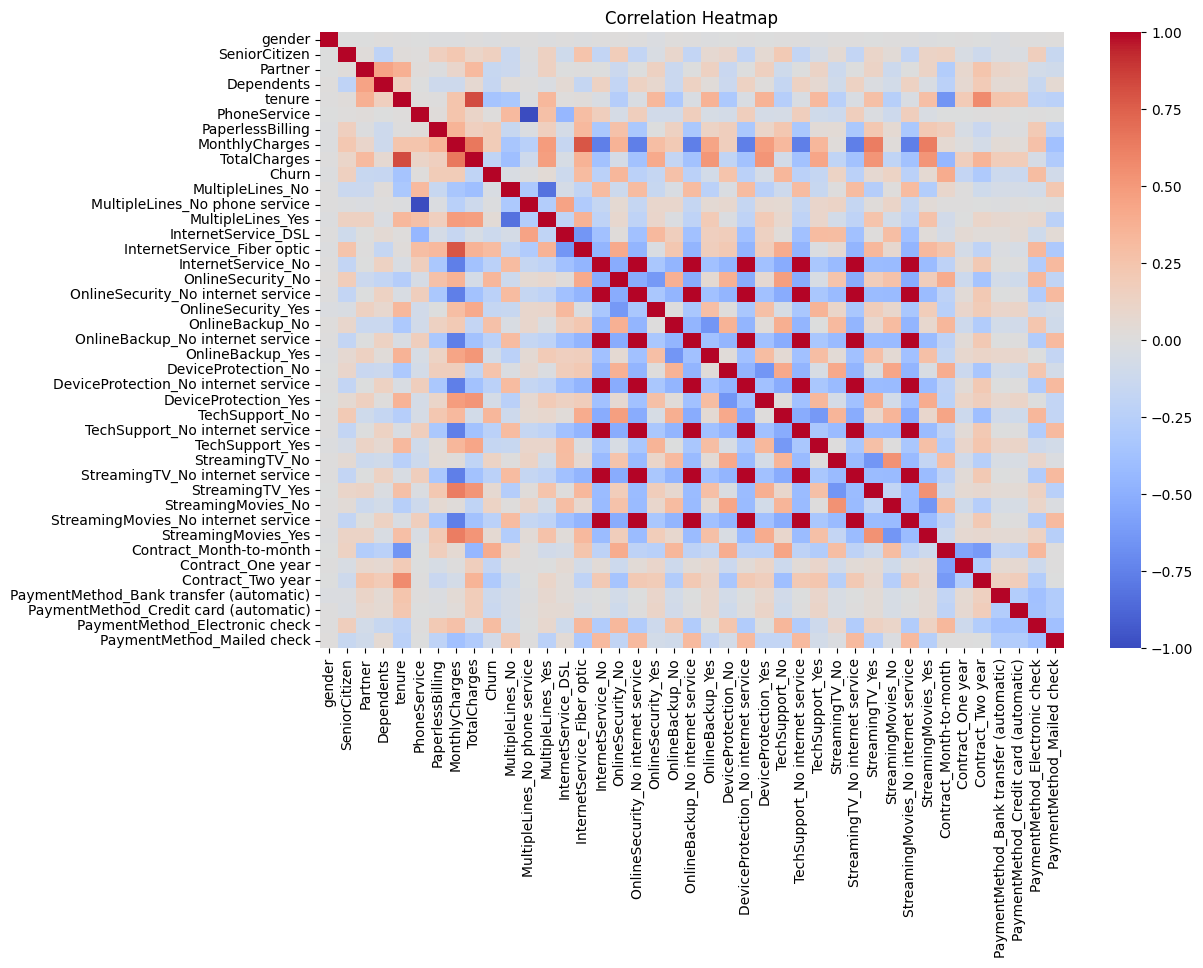

In [104]:
# Computes correlation matrix
correlation_matrix = df_encoded.corr()

# Plots the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

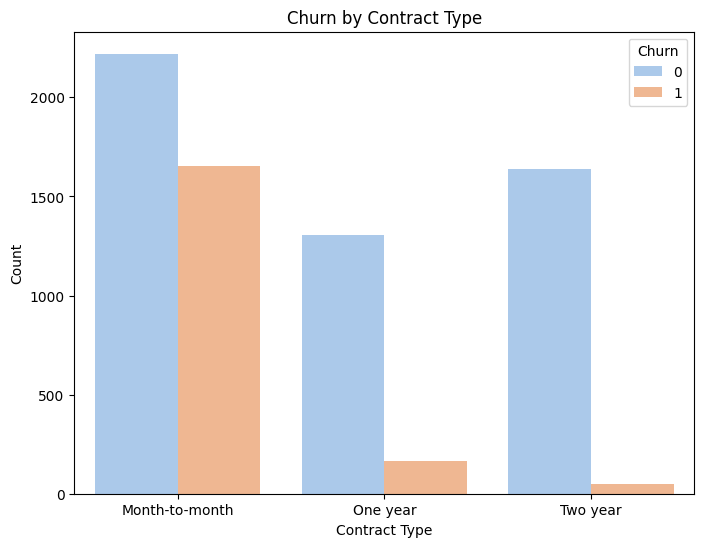

In [105]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

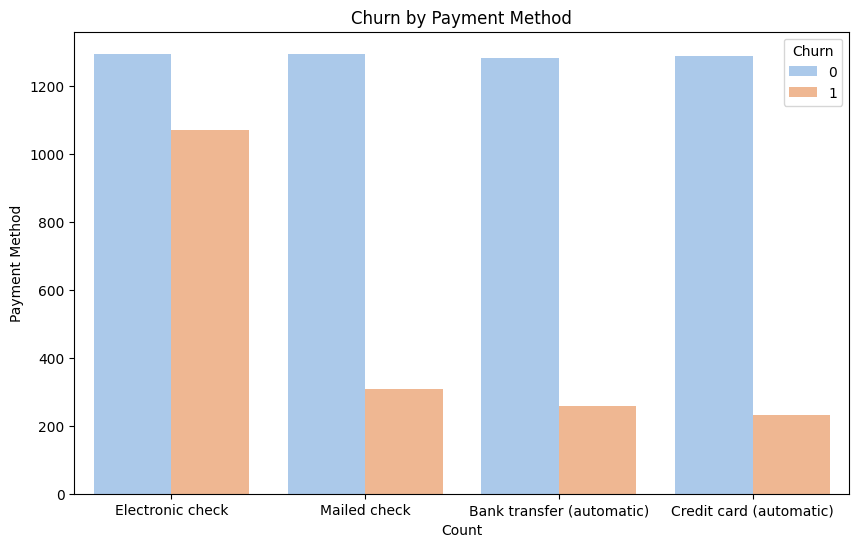

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='pastel')
plt.title('Churn by Payment Method')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.legend(title='Churn', loc='upper right')
plt.show()

#### Feature Selection

In [107]:
# Chi-Square Feature Selection

from sklearn.feature_selection import chi2, SelectKBest

X_categorical = df_encoded.select_dtypes(include=['int64']).drop(columns=['Churn', 'tenure'])
y = df_encoded['Churn']  # Target variable

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_categorical, y)
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

significance_threshold = 0.05

# Identify significant features
significant_features = [
    feature for feature, p_value in zip(X_categorical.columns, chi2_pvalues) if p_value < significance_threshold
]

# Print the significant features and their stats
print("Significant Features (P-value < 0.05):")
for feature, score, p_value in zip(X_categorical.columns, chi2_scores, chi2_pvalues):
    if p_value < significance_threshold:
        print(f"Feature: {feature}, Chi2 Score: {score:.2f}, P-Value: {p_value:.4f}")

print("-----")

# Print insignificant features
print("Dropped Insignificant Features (P-value >= 0.05):")
for feature, score, p_value in zip(X_categorical.columns, chi2_scores, chi2_pvalues):
    if p_value >= significance_threshold:
        print(f"Feature: {feature}, Chi2 Score: {score:.2f}, P-Value: {p_value:.4f}")

Significant Features (P-value < 0.05):
Feature: SeniorCitizen, Chi2 Score: 133.48, P-Value: 0.0000
Feature: Partner, Chi2 Score: 81.86, P-Value: 0.0000
Feature: Dependents, Chi2 Score: 131.27, P-Value: 0.0000
Feature: PaperlessBilling, Chi2 Score: 104.98, P-Value: 0.0000
Feature: MultipleLines_No, Chi2 Score: 3.89, P-Value: 0.0486
Feature: MultipleLines_Yes, Chi2 Score: 6.51, P-Value: 0.0107
Feature: InternetService_DSL, Chi2 Score: 71.14, P-Value: 0.0000
Feature: InternetService_Fiber optic, Chi2 Score: 372.08, P-Value: 0.0000
Feature: InternetService_No, Chi2 Score: 285.48, P-Value: 0.0000
Feature: OnlineSecurity_No, Chi2 Score: 414.04, P-Value: 0.0000
Feature: OnlineSecurity_No internet service, Chi2 Score: 285.48, P-Value: 0.0000
Feature: OnlineSecurity_Yes, Chi2 Score: 147.17, P-Value: 0.0000
Feature: OnlineBackup_No, Chi2 Score: 282.49, P-Value: 0.0000
Feature: OnlineBackup_No internet service, Chi2 Score: 285.48, P-Value: 0.0000
Feature: OnlineBackup_Yes, Chi2 Score: 31.21, P-Va

In [108]:
# ANOVA feature selection

from sklearn.feature_selection import f_classif

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_numerical = df_encoded[numerical_features]
y = df_encoded['Churn']

f_values, p_values = f_classif(X_numerical, y)

# Display results
print("ANOVA Results:")
for feature, f_value, p_value in zip(numerical_features, f_values, p_values):
    print(f"Feature: {feature}, F-Value: {f_value:.2f}, P-Value: {p_value:.4f}")

ANOVA Results:
Feature: tenure, F-Value: 1007.51, P-Value: 0.0000
Feature: MonthlyCharges, F-Value: 271.58, P-Value: 0.0000
Feature: TotalCharges, F-Value: 291.34, P-Value: 0.0000


In [109]:
# Drops insignificant features determined from Chi-Square and ANOVA

df_feature_selected = df_encoded.drop(columns=['gender', 'PhoneService', 'MultipleLines_No phone service'])

df_feature_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PaperlessBilling                         7032 non-null   int64  
 5   MonthlyCharges                           7032 non-null   float64
 6   TotalCharges                             7032 non-null   float64
 7   Churn                                    7032 non-null   int64  
 8   MultipleLines_No                         7032 non-null   int64  
 9   MultipleLines_Yes                        7032 non-null   int64  
 10  InternetService_DSL                      7032 no

#### Outlier Detection

In [110]:
# Finds outliers through IQR

outlier_copy = df_feature_selected.copy()

def calculate_iqr_bounds_and_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = round(Q1 - 1.5 * IQR, 4)
    upper_bound = round(Q3 + 1.5 * IQR, 4)
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return (lower_bound, upper_bound), outliers.shape[0]

outliers_df = pd.DataFrame(columns=['Feature', 'IQR Bounds', 'Number of Outliers'])

for feature in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    bounds, num_outliers = calculate_iqr_bounds_and_outliers(outlier_copy, feature)
    new_row = pd.DataFrame({'Feature': [feature], 'IQR Bounds': [bounds], 'Number of Outliers': [num_outliers]})
    outliers_df = pd.concat([outliers_df, new_row], ignore_index=True)

print(outliers_df)

          Feature               IQR Bounds Number of Outliers
0          tenure           (-60.0, 124.0)                  0
1  MonthlyCharges       (-45.825, 171.275)                  0
2    TotalCharges  (-4688.4813, 8884.6688)                  0


#### Normalization

In [111]:
# Robust scale numerical features

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
normalized_df = df_feature_selected.copy()

# Robust scaling of all numerical features
for feature in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    column_data = normalized_df[[feature]]
    scaled_data = scaler.fit_transform(column_data)
    normalized_df[feature] = scaled_data

normalized_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-0.608696,1,-0.746200,-0.403038,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.108696,0,-0.246891,0.145000,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,-0.586957,1,-0.304007,-0.379963,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.347826,0,-0.516813,0.130633,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,-0.586957,1,0.006449,-0.367144,1,1,0,...,1,0,0,1,0,0,0,0,1,0


In [112]:
normalized_df.to_csv('../dataset/processed/Telco-Customer-Churn-Processed.csv', index=False)